<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/cirfar100/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
from keras.datasets import cifar100
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [2]:
import cv2 as cv
import os
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
y_train[:100].shape

(100, 1)

In [4]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

[19]


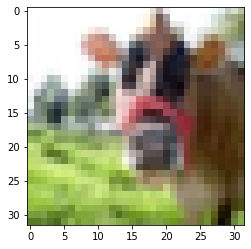

In [5]:
plt.imshow(x_train[0])
print(y_train[0])

[3]


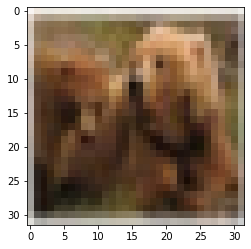

In [6]:
plt.imshow(x_train[-3])
print(y_train[-3])

In [7]:
import tensorflow as tf 
x_leftright = []
y_leftright  = []
for i in range(x_train.shape[0]):
  x = tf.image.flip_left_right(x_train[i])
  y = y_train[i]
  x_leftright.append(x)
  y_leftright.append(y)

In [ ]:
y_leftright

In [9]:
x_leftright = np.array(x_leftright)
y_leftright = np.array(y_leftright)

In [10]:
x_leftright.shape

(50000, 32, 32, 3)

In [11]:
y_leftright[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

[19]


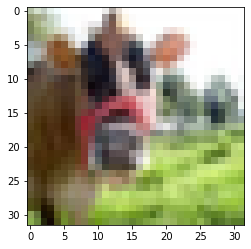

In [12]:
plt.imshow(x_leftright[0])
print(y_leftright[0])

In [13]:
import tensorflow as tf 
x_updown = []
y_updown  = []
for i in range(x_train.shape[0]):
  x = tf.image.flip_up_down(x_train[i])
  y = y_train[i]
  x_updown.append(x)
  y_updown.append(y)

In [14]:
x_updown = np.array(x_updown)
y_updown = np.array(y_updown)

[19]


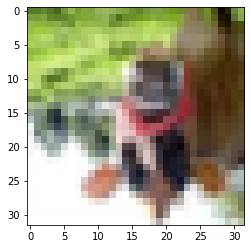

In [15]:
plt.imshow(x_updown[0])
print(y_updown[0])

In [ ]:
y_updown[:100]

In [16]:
X_train = np.concatenate((x_train,x_leftright,x_updown))


In [17]:
X_train.shape

(150000, 32, 32, 3)

In [18]:
Y_train = np.concatenate((y_train,y_leftright,y_updown))

In [19]:
Y_train.shape

(150000, 1)

In [20]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
X_train /= 255
x_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_train shape: (150000, 32, 32, 3)
150000 train samples
10000 test samples


In [21]:
X_train.shape

(150000, 32, 32, 3)

In [22]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K

In [33]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)       

In [29]:
Y_train.shape

(150000, 100)

In [34]:
hist = model.fit(X_train, Y_train,batch_size=128,epochs=30,verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
1172/1172 [==============================] - 29s 24ms/step - loss: 3.1347 - accuracy: 0.2337 - val_loss: 2.7869 - val_accuracy: 0.3030
Epoch 2/30
1172/1172 [==============================] - 26s 22ms/step - loss: 2.1438 - accuracy: 0.4225 - val_loss: 2.2080 - val_accuracy: 0.4199
Epoch 3/30
1172/1172 [==============================] - 26s 22ms/step - loss: 1.7164 - accuracy: 0.5211 - val_loss: 2.0018 - val_accuracy: 0.4742
Epoch 4/30
1172/1172 [==============================] - 27s 23ms/step - loss: 1.4068 - accuracy: 0.5957 - val_loss: 1.9439 - val_accuracy: 0.5021
Epoch 5/30
1172/1172 [==============================] - 27s 23ms/step - loss: 1.1428 - accuracy: 0.6640 - val_loss: 1.9212 - val_accuracy: 0.5190
Epoch 6/30
1172/1172 [==============================] - 26s 22ms/step - loss: 0.9088 - accuracy: 0.7236 - val_loss: 2.1108 - val_accuracy: 0.5111
Epoch 7/30
1172/1172 [==============================] - 26s 22ms/step - loss: 0.7155 - accuracy: 0.7763 - val_loss: 2.0553 -

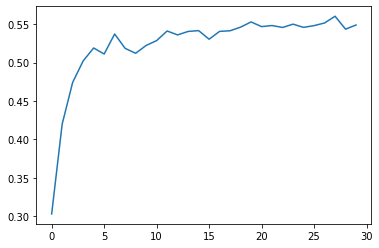

In [35]:
plt.plot(hist.history['val_accuracy'])

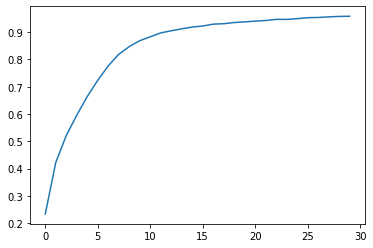

In [36]:
plt.plot(hist.history['accuracy'])

In [37]:
model.save('cifar100.h5')

In [38]:
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [41]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))	
	
	return img

truth forest
predict bottle


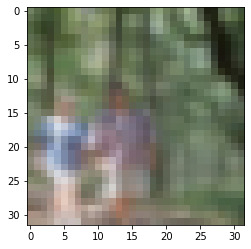

In [89]:
plt.imshow(x_test[1])
print('truth',classes[np.argmax(y_test[1])])
result = model.predict(x_test[[1]])
predict = classes[np.argmax(result)]
print('predict',predict)

truth mountain
predict road


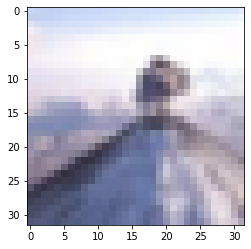

In [90]:
plt.imshow(x_test[0])
print('truth',classes[np.argmax(y_test[0])])
result = model.predict(x_test[[0]])
predict = classes[np.argmax(result)]
print('predict',predict)

truth seal
predict beaver
beaver là hải ly ó 


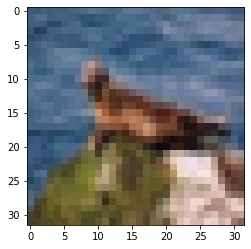

In [104]:
plt.imshow(x_test[2])
print('truth',classes[np.argmax(y_test[2])])
result = model.predict(x_test[[2]])
predict = classes[np.argmax(result)]
print('predict',predict)
print('beaver là hải ly ó ')

truth camel
predict cattle
cattle là trâu bò á 


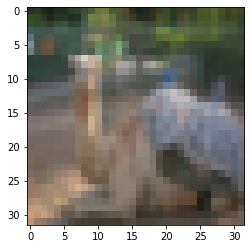

In [106]:
plt.imshow(x_test[6])
print('truth',classes[np.argmax(y_test[6])])
result = model.predict(x_test[[6]])
predict = classes[np.argmax(result)]
print('predict',predict)
print('cattle là trâu bò á ')

truth crab
predict crab


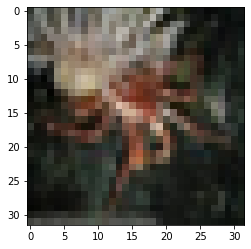

In [108]:
plt.imshow(x_test[100])
print('truth',classes[np.argmax(y_test[100])])
result = model.predict(x_test[[100]])
predict = classes[np.argmax(result)]
print('predict',predict)


truth rabbit
predict hamster


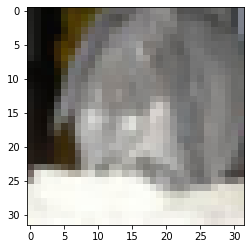

In [110]:
plt.imshow(x_test[1000])
print('truth',classes[np.argmax(y_test[1000])])
result = model.predict(x_test[[1000]])
predict = classes[np.argmax(result)]
print('predict',predict)


truth beaver
predict beaver


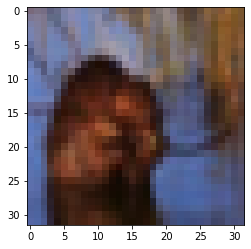

In [112]:
plt.imshow(x_test[50])
print('truth',classes[np.argmax(y_test[50])])
result = model.predict(x_test[[50]])
predict = classes[np.argmax(result)]
print('predict',predict)

truth mountain
predict road
truth forest
predict bottle
truth seal
predict beaver
truth mushroom
predict television
truth sea
predict cloud
truth tulip
predict spider
truth camel
predict cattle


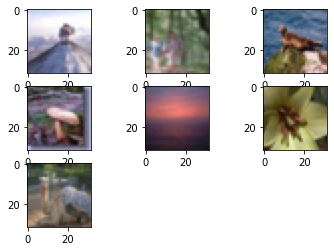

In [103]:
for i in range(7):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
  print('truth',classes[np.argmax(y_test[i])])
  result = model.predict(x_test[[i]])
  predict = classes[np.argmax(result)]
  print('predict',predict)
plt.show()

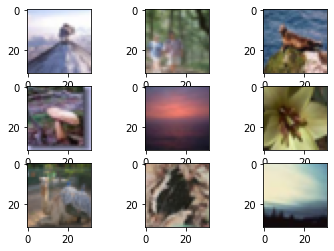

In [95]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
plt.show()